In [3]:
import pandas as pd

# Load the 'regularization' data previously stored
%store -r regularization

cleaned_dataset = pd.read_csv('cleaned_dataset.csv')
feature_dataset = {}

shuttlecock_position_columns = ['SHUTTLECOCK POSITIION IN AIR(X) metres', 'SHUTTLECOCK POSITIION IN AIR(Y) metres', 'SHUTTLECOCK POSITIION IN AIR(Z) metres']
shuttlecock_position = cleaned_dataset[shuttlecock_position_columns]

dataset = cleaned_dataset.drop(shuttlecock_position_columns, axis=1)

for axis, weights in regularization.iterrows():
    lasso_weights = weights['Lasso Weight']
    columns_to_remove = [index for index, weight in enumerate(lasso_weights) if weight == 0]

    for index in columns_to_remove:
        try:
            feature_dataset[axis] = dataset.drop(dataset.columns[index], axis=1)
        except IndexError:
            pass

    print(f'Dataset for {axis}:')
    print(feature_dataset[axis].head(3).to_string(index=False))
    print()

Dataset for X:
 HUMAN PLAYER POSITION (Y) metres  INITITAL VELOCITY OF SHUTTELCOCK(m/s)  INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)  SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)  TIME
                                1                                     10                                         40                                            0     0
                                1                                     10                                         40                                            0    10
                                1                                     10                                         40                                            0    20

Dataset for Y:
 HUMAN PLAYER POSITION (X) metres  HUMAN PLAYER POSITION (Y) metres  INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)  SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)  TIME
                                4                                 1                                         40                             

In [4]:
from sklearn.preprocessing import StandardScaler

standardized_dataset = {}

for axis, data in feature_dataset.items():
    standardized_dataset[axis] = pd.DataFrame(StandardScaler().fit_transform(data), columns=feature_dataset[axis].columns)
    
    print(f'Standardized dataset for {axis}:')
    print(standardized_dataset[axis].head(3).to_string(index=False))
    print()


Standardized dataset for X:
 HUMAN PLAYER POSITION (Y) metres  INITITAL VELOCITY OF SHUTTELCOCK(m/s)  INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)  SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)      TIME
                        -1.317609                              -0.372838                                  -1.240338                                     -0.12118 -1.507997
                        -1.317609                              -0.372838                                  -1.240338                                     -0.12118 -1.484410
                        -1.317609                              -0.372838                                  -1.240338                                     -0.12118 -1.460824

Standardized dataset for Y:
 HUMAN PLAYER POSITION (X) metres  HUMAN PLAYER POSITION (Y) metres  INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)  SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)      TIME
                              0.0                         -1.317609                          

Principal Component(s) to keep for X: 4



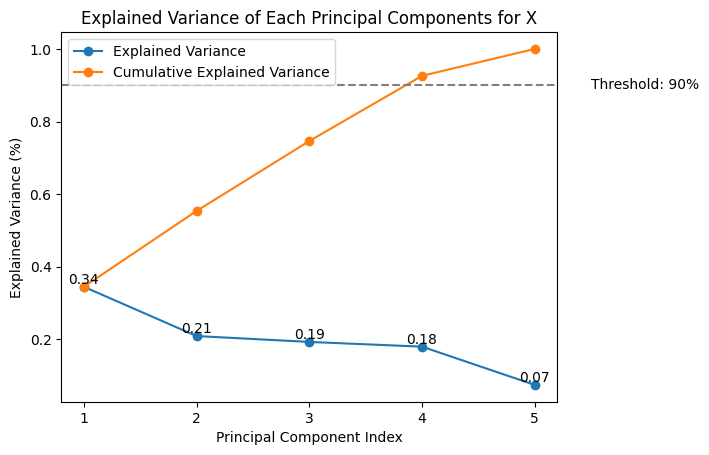

Principal Component(s) to keep for Y: 4



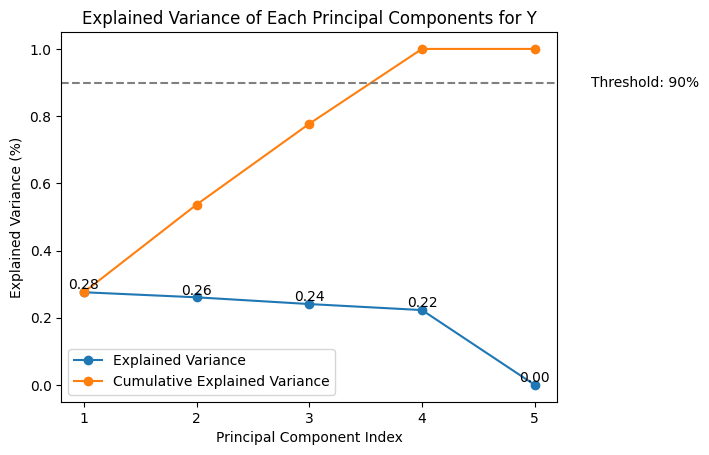

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

for axis, data in standardized_dataset.items():
    pca = PCA()
    pca.fit(data)

    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = pca.explained_variance_ratio_.cumsum()

    x_axis = np.arange(1, len(explained_variance) + 1) 
    fig, ax = plt.subplots()
    ax.plot(x_axis, explained_variance, marker='o', linestyle='-', label='Explained Variance')

    for index, variance in enumerate(explained_variance):
        ax.text(x_axis[index], variance, f'{variance:.2f}', ha='center', va='bottom')

    ax.plot(x_axis, cumulative_variance, marker='o', linestyle='-', label='Cumulative Explained Variance')

    ax.set_xlabel('Principal Component Index')
    ax.set_ylabel('Explained Variance (%)')
    ax.set_xticks(x_axis)
    ax.set_title(f'Explained Variance of Each Principal Components for {axis}')
    ax.legend()

    threshold = 0.9
    ax.axhline(y=threshold, color='grey', linestyle='--')
    ax.text(x_axis[-1] + 0.5, threshold, f"Threshold: {threshold:.0%}", ha='left', va='center')

    number_component = np.argmax(cumulative_variance >= threshold) + 1
    print(f"Principal Component(s) to keep for {axis}:", number_component)
    print()

    plt.show()

In [37]:
for axis, data in standardized_dataset.items():
    pca = PCA(number_component)
    principle_component = pd.DataFrame(data=pca.fit_transform(data), columns=[f'Principle Component {index + 1}' for index in range(number_component)])
    
    transformed_dataset = pd.concat([principle_component, shuttlecock_position], axis=1)
    transformed_dataset.to_csv(f'{axis}_axis_transformed.csv', index=False)

    print(transformed_dataset.head(3).to_string(index=False))

 Principle Component 1  Principle Component 2  Principle Component 3  Principle Component 4  SHUTTLECOCK POSITIION IN AIR(X) metres  SHUTTLECOCK POSITIION IN AIR(Y) metres  SHUTTLECOCK POSITIION IN AIR(Z) metres
             -0.285898               -0.89224               1.595116              -1.503978                                4.075543                                     1.0                                1.662912
             -0.296488               -0.89212               1.588906              -1.485737                                4.152007                                     1.0                                1.724866
             -0.307077               -0.89200               1.582695              -1.467496                                4.228906                                     1.0                                1.788139
 Principle Component 1  Principle Component 2  Principle Component 3  Principle Component 4  SHUTTLECOCK POSITIION IN AIR(X) metres  SHUTTLECOCK POSITII